In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
from scipy import stats
from scipy.stats import norm

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Import and put the train and test datasets in pandas dataframe
train = pd.read_csv('../1_House_Price_Project_X/train.csv')
test = pd.read_csv('../1_House_Price_Project_X/test.csv')

## 1. EDA

### 1) Exploring dataset

In [3]:
#Check the data size
print("Train dataset size :", train.shape)
print("Test dataset size :", test.shape)

Train dataset size : (1460, 81)
Test dataset size : (1459, 80)


In [4]:
#Display the last five rows of the train dataset
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
#Display the last five rows of the train dataset
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
numeric_features = train.dtypes[train.dtypes != 'object'].index
print('numeric_features qty :',len(numeric_features))
print('numeric_features : \n', numeric_features)

numeric_features qty : 38
numeric_features : 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [8]:
categorical_features = train.dtypes[train.dtypes == 'object'].index
print('categorical_features qty :',len(categorical_features))
print('categorical_features : \n', categorical_features)

categorical_features qty : 43
categorical_features : 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


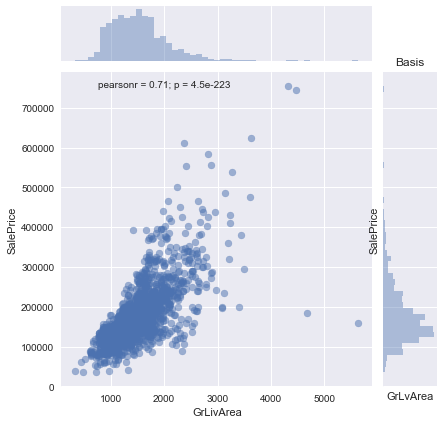

In [9]:
plt.figure(figsize = (6, 8))
sns.jointplot(train.GrLivArea, train.SalePrice, alpha = 0.5)
plt.xlabel('GrLvArea')
plt.ylabel('SalePrice')
plt.title('Basis')
plt.show()

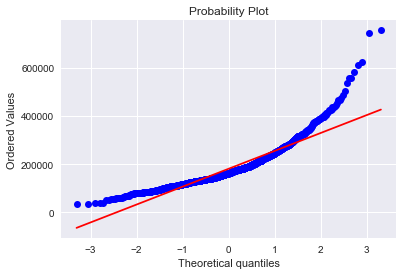

In [10]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [11]:
def detect_outliers(df,n,features):

    outlier_indices = []

    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        outlier = 1.5 * IQR
        
        # Determine a list of indices of outliers 
        outlier_list = df[(df[col] < Q1 - outlier) | (df[col] > Q3 + outlier )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [12]:
# Detect outliers 
Outliers_to_drop = detect_outliers(train,1,["SalePrice","GrLivArea","TotalBsmtSF","GarageArea"])
len(Outliers_to_drop)

31

In [13]:
train.loc[Outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
278,279,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,415298
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
477,478,60,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,380000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000


In [14]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

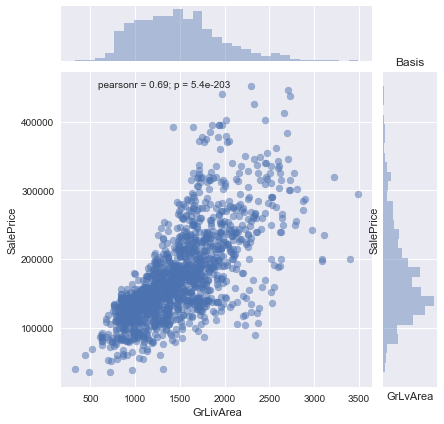

In [15]:
plt.figure(figsize = (6, 3))
sns.jointplot(train.GrLivArea, train.SalePrice, alpha = 0.5)
plt.xlabel('GrLvArea')
plt.ylabel('SalePrice')
plt.title('Basis')
plt.show()

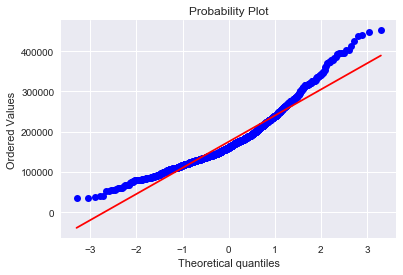

In [16]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [17]:
print("2ndFlrSF's missing Qty : {}".format(train["2ndFlrSF"].isnull().sum()))
print("TotalBsmtSF's missing Qty : {}".format(train["TotalBsmtSF"].isnull().sum()))

2ndFlrSF's missing Qty : 0
TotalBsmtSF's missing Qty : 0


In [18]:
df_train = train.copy()
df_train.drop('Id', axis=1, inplace=True)
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

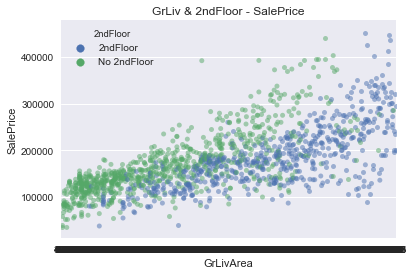

In [19]:
g = sns.stripplot(x = 'GrLivArea', y = 'SalePrice', hue="2ndFloor", data = df_train, alpha = 0.5)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_title('GrLiv & 2ndFloor - SalePrice')
plt.show()

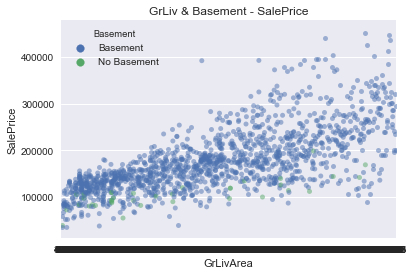

In [20]:
b = sns.stripplot(x = 'GrLivArea', y = 'SalePrice', hue="Basement", data = df_train, alpha = 0.5)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
b.set_title('GrLiv & Basement - SalePrice')
plt.show()

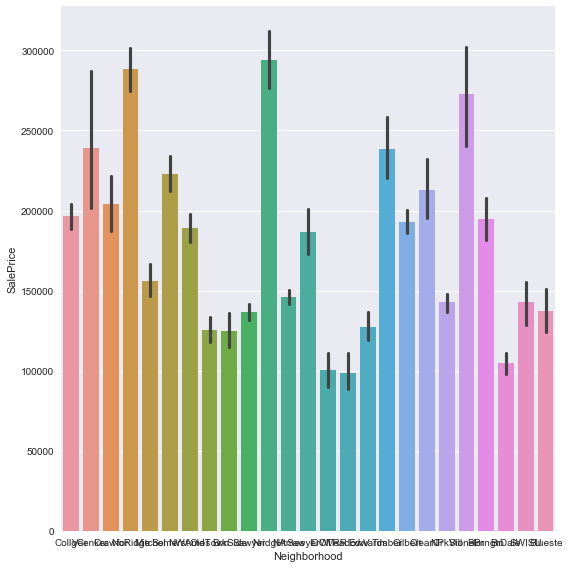

In [21]:
plt.figure(figsize = (8, 12))
sns.factorplot(x = "Neighborhood", y="SalePrice", data=df_train, size =8, kind="bar")

In [22]:
def Gp_Neighborhood(saleprice):
    if saleprice > 250000:
        return "first_group"
    elif saleprice > 200000:
        return "second_group"
    elif saleprice > 150000:
        return "third_group"
    else: 
        return "fourth_group"

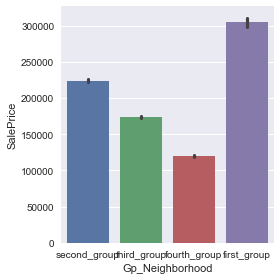

In [23]:
plt.figure(figsize = (8, 12))
df_train["Gp_Neighborhood"] = df_train["SalePrice"].apply(Gp_Neighborhood)
sns.factorplot(x="Gp_Neighborhood", y="SalePrice", data=df_train, kind="bar")
plt.show()

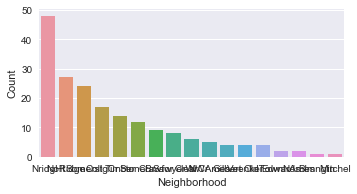

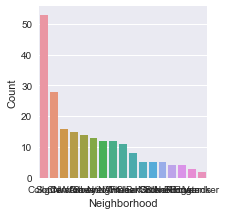

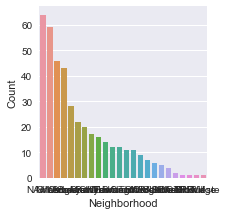

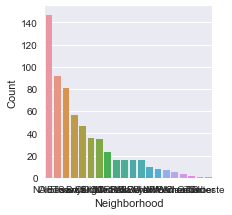

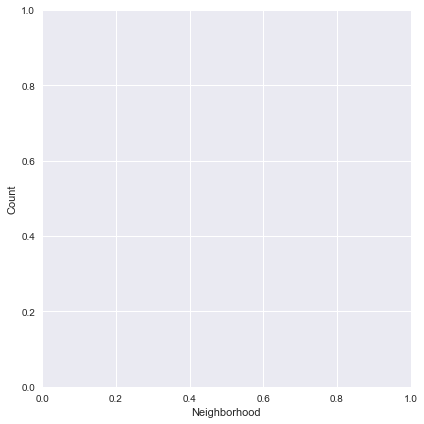

In [24]:
plt.figure(figsize = (12,6))

ax1 = plt.subplot(2, 2, 1)
first_group = df_train[df_train["Gp_Neighborhood"] =="first_group"]["Neighborhood"]
first_group = pd.DataFrame(first_group.value_counts()).reset_index()
first_group = first_group.rename(columns={"index":"Neighborhood", "Neighborhood" :"Count"})
sns.factorplot(x = "Neighborhood", y="Count", data=first_group, kind="bar", size=6, ax = ax1)
# plt.xticks(rotation='45')


ax2 = plt.subplot(2, 2, 2)
second_group = df_train[df_train["Gp_Neighborhood"] =="second_group"]["Neighborhood"]
second_group = pd.DataFrame(second_group.value_counts()).reset_index()
second_group = second_group.rename(columns={"index":"Neighborhood", "Neighborhood" :"Count"})
sns.factorplot(x = "Neighborhood", y="Count", data=second_group, kind="bar", size=6, ax=ax2)


ax3 = plt.subplot(2, 2, 3)
third_group = df_train[df_train["Gp_Neighborhood"] =="third_group"]["Neighborhood"]
third_group = pd.DataFrame(third_group.value_counts()).reset_index()
third_group = third_group.rename(columns={"index":"Neighborhood", "Neighborhood" :"Count"})
sns.factorplot(x = "Neighborhood", y="Count", data=third_group, kind="bar", size=6, ax=ax3)


ax4 = plt.subplot(2, 2, 4)
fourth_group = df_train[df_train["Gp_Neighborhood"] =="fourth_group"]["Neighborhood"]
fourth_group = pd.DataFrame(fourth_group.value_counts()).reset_index()
fourth_group = fourth_group.rename(columns={"index":"Neighborhood", "Neighborhood" :"Count"})
sns.factorplot(x = "Neighborhood", y="Count", data=fourth_group, kind="bar", size=6, ax=ax4)

plt.show()

In [25]:
df_train["Count"] = 1

In [26]:
Street = df_train.pivot_table(index="Gp_Neighborhood", columns=["Street"], values="Count", aggfunc='sum')
Street

# df_train["Street"] = df_train.groupby("Gp_Neighborhood")["Street"].transform(lambda x : x.fillna(x.mode()))

# Street = df_train.pivot_table(index="Gp_Neighborhood", columns=["Street"], values="Count", aggfunc='sum')
# Street
# first_group = df_train[df_train["Gp_Neighborhood"] =="first_group"]
# first_group.pivot_table(index = "Gp_Neighborhood", values=""  )

Street,Grvl,Pave
Gp_Neighborhood,,
first_group,NaN,188.0
fourth_group,4.0,615.0
second_group,1.0,209.0
third_group,1.0,411.0


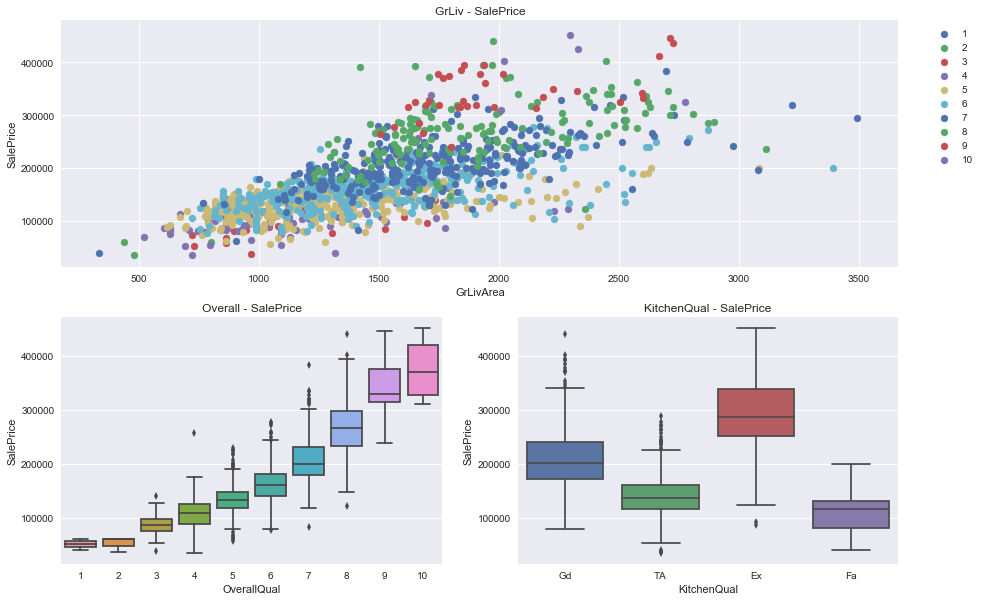

In [27]:
#Group of size-related variables
plt.figure(figsize= (15, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan = 2)
for val in range(1,10+1):
    index = train.OverallQual == val
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data = train, label=val)
ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('SalePrice')
ax1.legend(bbox_to_anchor = [1.1, 1])
ax1.set_title('GrLiv - SalePrice')

ax2 = plt.subplot2grid((2, 2), (1, 0))
sns.boxplot( x = 'OverallQual', y = 'SalePrice', data = train, ax = ax2)
ax2.set_xlabel('OverallQual')
ax2.set_ylabel('SalePrice')
ax2.set_title('Overall - SalePrice')

ax3 = plt.subplot2grid((2, 2), (1, 1))
sns.boxplot( x = 'KitchenQual', y = 'SalePrice', data = train, ax = ax3)
ax3.set_xlabel('KitchenQual')
ax3.set_ylabel('SalePrice')
ax3.set_title('KitchenQual - SalePrice')


plt.show()